In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('C:/Users/Fatemeh/Desktop/Covid Project/Ipl-2022 dataset/ipl_2022_dataset.csv')
df.head(10)

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
5,5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans
6,6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,NaN,Gujarat Titans
7,7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans
8,8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans
9,9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,NaN,Gujarat Titans


In [3]:
df.shape

(633, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       633 non-null    int64  
 1   Player           633 non-null    object 
 2   Base Price       633 non-null    object 
 3   TYPE             633 non-null    object 
 4   COST IN ₹ (CR.)  237 non-null    float64
 5   Cost IN $ (000)  237 non-null    float64
 6   2021 Squad       199 non-null    object 
 7   Team             633 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 39.7+ KB


In [5]:
df.drop(['Unnamed: 0'], inplace =True, axis =1)

In [6]:
df.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [7]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)


In [8]:
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)


In [9]:
df.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)      0
Cost IN $ (000)      0
2021 Squad         434
Team                 0
dtype: int64

In [10]:
df['2021 Squad']= df['2021 Squad'].fillna('Not participated')
df.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [11]:
teams = df[df['COST IN ₹ (CR.)']>0].Team.unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [12]:
df['Status']= df['Team'].replace(teams, 'Sold')

In [13]:
df.head(10)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans,Sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans,Sold
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans,Sold
4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans,Sold
5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans,Sold
6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,Not participated,Gujarat Titans,Sold
7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans,Sold
8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans,Sold
9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,Not participated,Gujarat Titans,Sold


In [14]:
df[df['Player'].duplicated(keep=False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,Sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,Not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,Not participated,Unsold,Unsold


In [15]:
df.drop_duplicates(subset=['Player'], inplace = True)

In [16]:
df.shape[0]

629

In [17]:
types = df['TYPE'].value_counts()
types


ALL-ROUNDER     241
BOWLER          212
BATTER          112
WICKETKEEPER     64
Name: TYPE, dtype: int64

[]

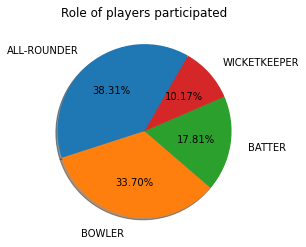

In [18]:
plt.pie(types.values,labels = types.index, labeldistance = 1.2, autopct = '%1.2f%%', shadow =True, startangle = 60)
plt.title('Role of players participated')
plt.plot()

In [19]:
status = df['Status'].value_counts().reset_index()
status

,index,Status
0,Unsold,392
1,Sold,237


Text(0.5, 1.0, 'Sold vs Unsolds')

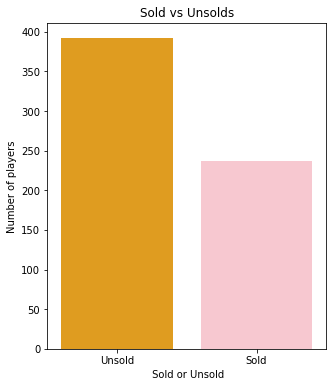

In [20]:
fig =plt.figure(figsize=(5,6))
sns.barplot(data = status, x = status['index'] , y =status.Status, palette =['Orange', 'pink'])
plt.xlabel(' Sold or Unsold')
plt.ylabel('Number of players')
plt.title('Sold vs Unsolds')

[]

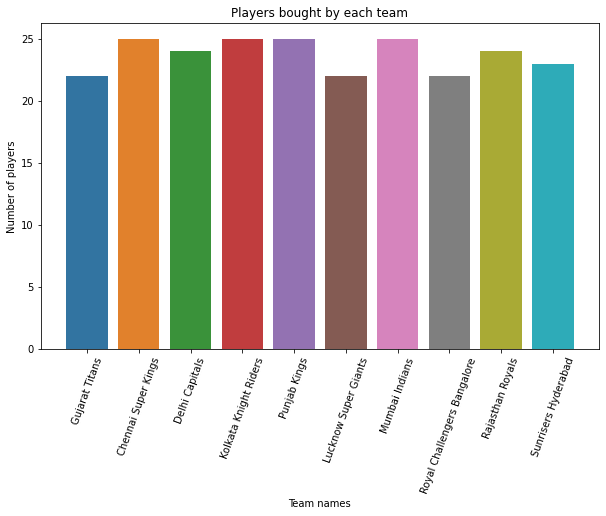

In [21]:
fig =plt.figure(figsize=(10,6))
sns.countplot(df[df['Team']!= "Unsold"]['Team'])
plt.xlabel('Team names')
plt.ylabel('Number of players')
plt.title('Players bought by each team')
plt.xticks(rotation = 70)
plt.plot()


In [22]:
df['Retention'] = df['Base Price']


In [23]:
df['Retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh', '50 Lakh', '30 Lakh', '1.5 Cr'], 'From Auction', inplace =True)


In [24]:
df['Base Price'].replace('Draft Pick', 0, inplace =True)

In [25]:
df['Base_Price_Unit']= df['Base Price'].apply(lambda x: str(x).split(' ')[-1])
df['base price']= df['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [26]:
df['Base Price'].replace('Retention', 0, inplace =True)

In [27]:
df.head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,base price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,Sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,Sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,Sold,From Auction,Lakh,40
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,Sold,Draft Pick,0,0


In [28]:
df.groupby(['Team', 'Retention'])['Retention'].count()[:-1]

Team                         Retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

Text(0.5, 1.0, 'Number of Players based on their Role')

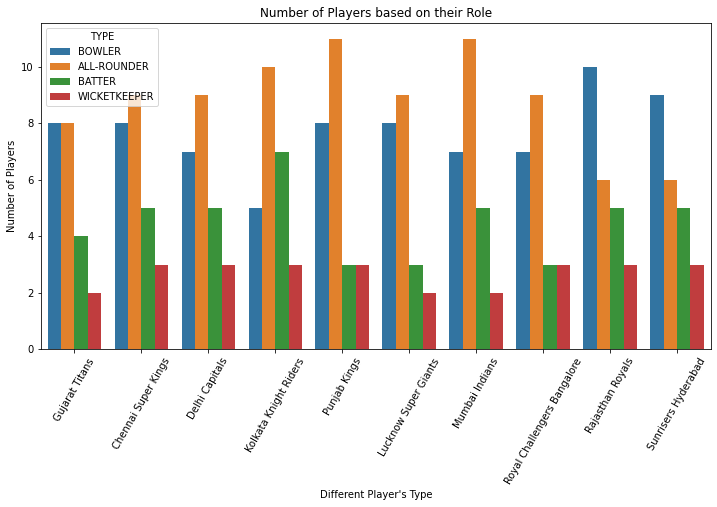

In [29]:
fig = plt.figure(figsize=(12,6))
sns.countplot(df[df['Team']!= 'Unsold']['Team'], hue = df['TYPE'])
plt.xlabel("Different Player's Type")
plt.ylabel('Number of Players')
plt.xticks(rotation =60)
plt.title('Number of Players based on their Role')

In [30]:
# Highest amount spent on a single player by each team

df[df['Retention']== 'From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending =True)

Team
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Punjab Kings                   11.50
Kolkata Knight Riders          12.25
Chennai Super Kings            14.00
Mumbai Indians                 15.25
Name: COST IN ₹ (CR.), dtype: float64

In [31]:
df[(df['Retention']== 'From Auction') & (df['TYPE']=='BOWLER')].sort_values(by ='COST IN ₹ (CR.)', ascending =False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,base price
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,Sold,From Auction,Cr,2
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,Sold,From Auction,Cr,2
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,Sold,From Auction,Cr,1
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,Sold,From Auction,Cr,2
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,Sold,From Auction,Lakh,20


In [32]:
# Player retained at maximum price

df[df['Retention']== 'Retained'].sort_values(by= 'COST IN ₹ (CR.)', ascending =False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price_Unit,base price
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,Sold,Retained,Retained,Retained
